In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pickle

# Environment

In [3]:
def get_card(initial=False):
    card = np.random.choice(range(1, 11))
    if initial:
        return card
    else:
        color = np.random.choice([-1, 1], p=[1/3, 2/3])
        return color * card

def step(state, action):
    # state <- [dealer's first card [1, 10], player's sum [1, 21]]
    # action : stick <- 0, hit <- 1
    if action == 1:
        state[1] += get_card()
        if state[1] > 21 or state[1] < 1:
            return state, -1, True
        else:
            return state, 0, False
    elif action == 0:
        dealer_hand = state[0]
        while dealer_hand < 17:
            dealer_hand += get_card()
            if dealer_hand < 1 or dealer_hand > 21:
                return state, 1, True

        if state[1] > dealer_hand:
            return state, 1, True
        elif state[1] < dealer_hand:
            return state, -1, True
        else:
            return state, 0, True
    else:
        raise Exception('step: wrong action')

In [4]:
def eps(dic, visits, N_0=100):
    return N_0 / (N_0 + visits)

In [5]:
def state_visited(dic, state):
    x = []
    for k in list(dic.keys()):
        if k[0] == tuple(state):
            x.append(k)
    return x

def state_action_visited(dic, state, action):
    for k in list(dic.keys()):
        if k[0] == tuple(state) and k[1] == action:
            return True
    return False

# Monte Carlo Control

In [5]:
N_sa = {}
Q_sa = {}

EPISODES = 100_000

for episode in (t := trange(EPISODES)):
    visits = []
    state = [get_card(initial=True), get_card(initial=True)]
    done = False
    while not done:
        x = state_visited(N_sa, state)
        if len(x) > 0:
            total_visits = sum([N_sa[k] for k in x])
            t.set_description('{:.2f}'.format(eps(N_sa, total_visits)))
            if random.random() < eps(N_sa, total_visits):
                action = np.random.choice([0, 1])
            else:
                vk = state_visited(Q_sa, state)
                values = [Q_sa[k] for k in vk]
                action = vk[np.argmax(values)][1]
        else:
            action = np.random.choice([0, 1])
            
        if state_action_visited(N_sa, state, action):
            N_sa[(tuple(state), action)] += 1
        else:
            N_sa[(tuple(state), action)] = 1
            
        visits.append((tuple(state), action))
        
        state, reward, done = step(state, action)
        
    for i in range(len(visits)):
        if state_action_visited(Q_sa, visits[i][0], visits[i][1]):
            Q_sa[visits[i]] += (reward - Q_sa[visits[i]]) / N_sa[visits[i]]
        else:
            Q_sa[visits[i]] = reward / N_sa[visits[i]]

0.09: 100%|██████████| 100000/100000 [08:46<00:00, 190.10it/s]


In [6]:
print(len(N_sa), len(Q_sa))

420 420


In [7]:
N_sa

{((2, 2), 1): 135,
 ((2, 8), 1): 143,
 ((2, 9), 1): 326,
 ((2, 19), 0): 25,
 ((9, 5), 1): 152,
 ((9, 13), 0): 124,
 ((4, 7), 1): 128,
 ((4, 8), 1): 121,
 ((2, 5), 1): 121,
 ((2, 10), 0): 966,
 ((6, 9), 1): 170,
 ((6, 10), 1): 112,
 ((6, 15), 0): 39,
 ((9, 1), 0): 931,
 ((8, 1), 0): 887,
 ((5, 9), 1): 111,
 ((5, 15), 1): 28,
 ((5, 18), 1): 21,
 ((5, 19), 1): 24,
 ((8, 4), 1): 112,
 ((6, 8), 0): 810,
 ((1, 4), 0): 868,
 ((2, 15), 0): 63,
 ((9, 8), 1): 114,
 ((9, 10), 1): 130,
 ((8, 4), 0): 1001,
 ((10, 2), 1): 131,
 ((6, 7), 0): 864,
 ((9, 7), 1): 463,
 ((9, 4), 0): 941,
 ((8, 3), 1): 118,
 ((8, 12), 0): 47,
 ((8, 7), 1): 136,
 ((8, 11), 1): 31,
 ((8, 13), 0): 52,
 ((4, 1), 0): 931,
 ((8, 2), 0): 922,
 ((9, 3), 0): 122,
 ((7, 9), 0): 951,
 ((3, 3), 1): 121,
 ((3, 10), 1): 115,
 ((3, 6), 0): 983,
 ((4, 7), 0): 974,
 ((5, 8), 0): 992,
 ((1, 4), 1): 172,
 ((1, 14), 0): 67,
 ((5, 2), 1): 132,
 ((5, 12), 0): 45,
 ((4, 8), 0): 951,
 ((4, 10), 1): 121,
 ((4, 20), 0): 11,
 ((8, 2), 1): 122,
 ((8

In [8]:
Q_sa

{((2, 2), 1): -0.21531934411191375,
 ((2, 8), 1): -0.07692307692307687,
 ((2, 9), 1): 0.1350258480899788,
 ((2, 19), 0): 0.6799999999999999,
 ((9, 5), 1): -0.25647039330849936,
 ((9, 13), 0): -0.06451612903225808,
 ((4, 7), 1): -0.007812499999999951,
 ((4, 8), 1): -0.08264462809917357,
 ((2, 5), 1): -0.00014597556593601638,
 ((2, 10), 0): 0.2732919254658384,
 ((6, 9), 1): 0.04720002131287302,
 ((6, 10), 1): -0.04464285714285714,
 ((6, 15), 0): -0.02564102564102562,
 ((9, 1), 0): -0.20945220193340505,
 ((8, 1), 0): -0.1521984216459978,
 ((5, 9), 1): -0.08119331793639009,
 ((5, 15), 1): -0.5000000000000001,
 ((5, 18), 1): -0.5714285714285713,
 ((5, 19), 1): -0.5000000000000001,
 ((8, 4), 1): -0.23214285714285712,
 ((6, 8), 0): 1.0842021724855044e-18,
 ((1, 4), 0): 0.28110599078341014,
 ((2, 15), 0): 0.2063492063492063,
 ((9, 8), 1): -0.4210526315789472,
 ((9, 10), 1): -0.31512820512820494,
 ((8, 4), 0): -0.17082917082917082,
 ((10, 2), 1): -0.6187719880517756,
 ((6, 7), 0): 0.03935185185

In [9]:
data = {}
for i in range(1, 11):
    for j in range(1, 22):
        x = state_visited(Q_sa, (i, j))
        if len(x) == 0:
            data[(i, j)] = 0
        else:
            values = [Q_sa[k] for k in x]
            data[(i, j)] = np.max(values)

In [10]:
data

{(1, 1): 0.3455328310010762,
 (1, 2): 0.31127197518097177,
 (1, 3): 0.3406113537117902,
 (1, 4): 0.28110599078341014,
 (1, 5): 0.38613861386138565,
 (1, 6): 0.3303769401330383,
 (1, 7): 0.3587174348697401,
 (1, 8): 0.3141025641025642,
 (1, 9): 0.32210526315789434,
 (1, 10): 0.30793650793650806,
 (1, 11): 0.28813559322033894,
 (1, 12): 0.3650793650793652,
 (1, 13): 0.4181818181818182,
 (1, 14): 0.25373134328358216,
 (1, 15): 0.5384615384615385,
 (1, 16): 0.22580645161290325,
 (1, 17): 0.13793103448275862,
 (1, 18): 0.5862068965517242,
 (1, 19): 0.9375,
 (1, 20): 0.6363636363636364,
 (1, 21): 1.0,
 (2, 1): 0.19817767653758547,
 (2, 2): 0.23024830699774265,
 (2, 3): 0.25082146768893726,
 (2, 4): 0.23652365236523645,
 (2, 5): 0.30341880341880345,
 (2, 6): 0.2687499999999998,
 (2, 7): 0.22977346278317148,
 (2, 8): 0.21329046087888537,
 (2, 9): 0.2343749999999998,
 (2, 10): 0.2732919254658384,
 (2, 11): 0.12500000000000003,
 (2, 12): 0.31428571428571433,
 (2, 13): 0.5357142857142857,
 (2, 14

In [11]:
SAVE_OPTIMAL_POLICY = False
if SAVE_OPTIMAL_POLICY:
    with open('optimal_policy.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
xs = [i[0] for i in list(data.keys())]
ys = [i[1] for i in list(data.keys())]
zs = [data[i] for i in (data.keys())]

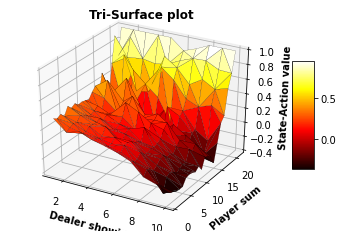

In [14]:
SAVE = False
fig = plt.figure()
ax = plt.axes(projection='3d')
trisurf = ax.plot_trisurf(xs, ys, zs,
                cmap=plt.get_cmap('hot'),
                linewidth = 0.15,  
                antialiased = True, 
                edgecolor = 'black')
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5) 
ax.set_title('Tri-Surface plot', fontweight='bold') 
  
ax.set_xlabel('Dealer showing', fontweight ='bold')  
ax.set_ylabel('Player sum', fontweight ='bold')  
ax.set_zlabel('State-Action value', fontweight ='bold')
if SAVE:
    plt.savefig('monte-carlo-control_easy21', dpi=300)
plt.show()

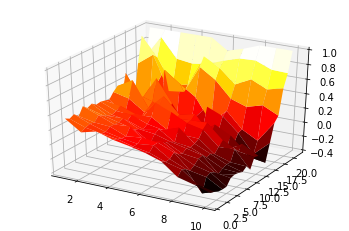

In [15]:
xs = np.array([k[0] for k in list(data.keys())]).reshape(10, 21)
ys = np.array([k[1] for k in list(data.keys())]).reshape(10, 21)
zs = np.array([data[k] for k in list(data.keys())]).reshape(10, 21)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xs, ys, zs, cmap=plt.get_cmap('hot'))
plt.show()

In [16]:
LOAD_OPTIMAL_POLICY = False
if LOAD_OPTIMAL_POLICY:
    with open('optimal_policy.pickle', 'rb') as handle:
        Q_sa = pickle.load(handle)

In [20]:
random_actions = 0
results = []
for episode in (t := trange(10_000)):
    state = [get_card(initial=True), get_card(initial=True)]
    done = False
    while not done:
        x = state_visited(N_sa, state)
        if len(x) > 0:            
            vk = state_visited(Q_sa, state)
            values = [Q_sa[k] for k in vk]
            action = vk[np.argmax(values)][1]
        else:
            random_actions += 1
            action = np.random.choice([0, 1])
        
        state, reward, done = step(state, action)
        
    results.append(reward)
    t.set_description("win percentage: {:.2f} %".format(results.count(1) / len(results) * 100))
    
print('random actions taken: {}'.format(random_actions))

print('win percentage: {}'.format(results.count(1) / len(results) * 100))
print('draw percentage: {}'.format(results.count(0) / len(results) * 100))
print('lose percentage: {}'.format(results.count(-1) / len(results) * 100))

win percentage: 53.12 %: 100%|██████████| 10000/10000 [00:30<00:00, 326.34it/s]

random actions taken: 0
win percentage: 53.12
draw percentage: 0.06
lose percentage: 46.82
